# Intro:
> Given data on term deposit subscriptions for a bank, build a classification model to predict subscribers.  Look at a simple classifier such as a Logistic Regression Classifier and compare with more complex classifiers such as Decision Tree and Random Forest.  A very important thing to consider with this classification is the values in the confusion matrix.  True positives and negatives are great, but what is more important is the amount of subscribers that the model doesn't catch.  These are going to be the false negatives or subscribers that the model predicted as non-subscribers.

> Another important aspect of this classification problem is how well the model generalizes from training to test data.  It is valuable to consider how the model is performing in regards to new data.

In [1]:
#Import basic libraries and create dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank_full.csv.zip')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA
 > Using tools in Pandas, inspect and learn about the data.
 * The .info() method shows total entries and how many non-null entries are in each column.
     If the non-null entries are the same number as the total entries, then there aren't any nulls.
 * Look at the data types of each column
 * Check histograms of continuous data
 * Inspect how the target variable is distributed across continuous data column

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [4]:
# create seperate dataframes with numerical and categorical data
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical.append(col)
    elif df[col].dtype == np.object:
        categorical.append(col)
        
numerical, categorical

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'Target'])

In [5]:
num_df = df[numerical]
num_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [6]:
# determine which categories have values labeled as unknown
binary_cat = []
for col in categorical:
    if len(df[col].value_counts()) <= 3:
        binary_cat.append(col)

for col in binary_cat:
    print(df[col].value_counts(), '\n')

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

no     39922
yes     5289
Name: Target, dtype: int64 



## Distribution checks 

In [7]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

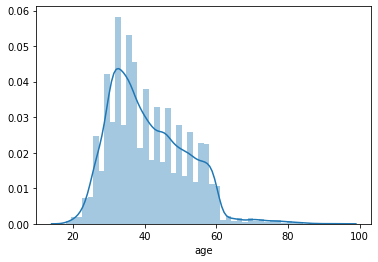

In [8]:
sns.distplot(df.age)

In [9]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

no     3354
yes    1935
Name: housing, dtype: int64

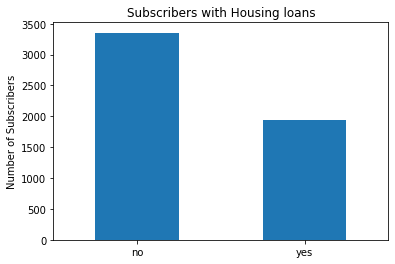

In [10]:
house_target = df[df['Target'] == 'yes']['housing']
house_target.value_counts().plot(kind='bar')

plt.title('Subscribers with Housing loans')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=None)
house_target.value_counts()


cellular     4369
unknown       530
telephone     390
Name: contact, dtype: int64

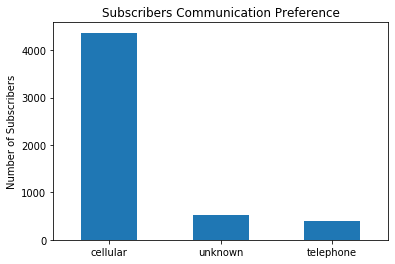

In [11]:
contact_target = df[df['Target'] == 'yes']['contact']
contact_target.value_counts().plot(kind='bar')

plt.title('Subscribers Communication Preference')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=None)

contact_target.value_counts()

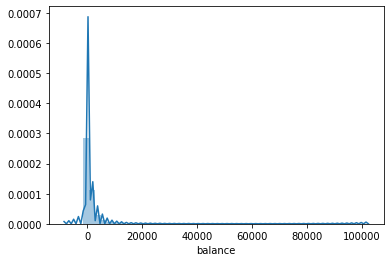

In [12]:
sns.distplot(df.balance)

In [13]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [14]:
df.balance.value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [15]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

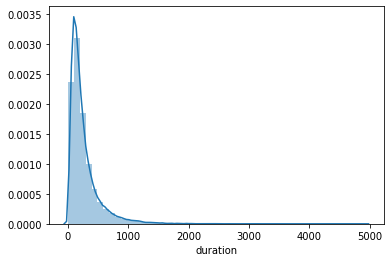

In [16]:
sns.distplot(df.duration)

83       1042
86       1467
87       1389
129       579
168       673
         ... 
45204     300
45205     386
45206     977
45207     456
45208    1127
Name: duration, Length: 5289, dtype: int64


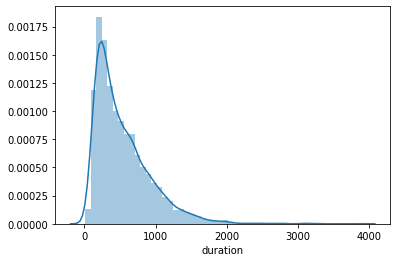

In [17]:
# look at how subscribers are distributed with respect to the duration feature
duration_target_yes = df[df['Target'] == 'yes']['duration']
sns.distplot(duration_target_yes)

print(duration_target_yes)

0         261
1         151
2          76
3          92
4         198
         ... 
45194     162
45198     333
45199    1166
45209     508
45210     361
Name: duration, Length: 39922, dtype: int64


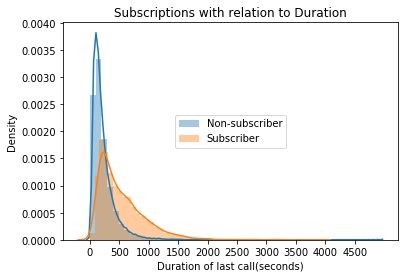

In [18]:
#look at how non-subscribers are distributed with respect to duration
#compare non-subscribers with subscribers
duration_target_no = df[df['Target'] == 'no']['duration']
sns.distplot(duration_target_no, label='Non-subscriber', )
sns.distplot(duration_target_yes, label='Subscriber')

plt.title('Subscriptions with relation to Duration')
plt.xlabel('Duration of last call(seconds)')
plt.ylabel('Density')

plt.xticks(ticks=np.arange(0,5000,500))

plt.legend(loc='center')
plt.show
print(duration_target_no)

# EDA Conclusions:
> The data was evenly split between numerical and categorical data types.  The continuous data, such as the balance and duration columns showed somewhat normal distributions.  They also showed to have a skew to the left.

> The age column has 78 different ages represented.  This will be something to work on in feature engineering.

> An interesting discovery was the distributions of subscribers vs nonsubscribers in the duration feature.  Theres a greater density of subscribers when the duration of the last call is greater than about 300 seconds.

# Feature Engineering
* Get the ages into 4 different groups

* Encode the categorical data



In [19]:
num_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [20]:
print(num_df.age.value_counts())

print(num_df.age.min(), num_df.age.max())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
18 95


In [21]:
(95-18)/4

19.25

In [22]:
def age_bins(df):
    """
    classifies age into 4 groups and assigns a value
    
    """
    df.loc[df.age <= 37, 'age'] = 1
    df.loc[(df.age > 37) & (df.age <= 56), 'age'] = 2
    df.loc[(df.age > 56) & (df.age <= 75), 'age'] = 3
    df.loc[df.age > 75, 'age'] = 4
    
    return(df)
    

In [23]:
age_bins(num_df)
num_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import 

,age,balance,day,duration,campaign,pdays,previous
0,3,2143,5,261,1,-1,0
1,2,29,5,151,1,-1,0
2,1,2,5,76,1,-1,0
3,2,1506,5,92,1,-1,0
4,1,1,5,198,1,-1,0


In [24]:
num_df.age.value_counts()

2    20680
1    20409
3     3861
4      261
Name: age, dtype: int64

In [25]:
cat_df = df[categorical]

for col in cat_df.columns:
    print(df[col].value_counts(), '\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [26]:
# numerically encode all categorical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

def label_encoder(df):
    """
    Inputs dataframe
    Outputs dataframe with categoricals encoded using LabelEncoder
    """
    
    for col in df.columns:
        df[col] = encoder.fit_transform(df[col])
        
    return(df)

In [27]:
cat_df = label_encoder(cat_df)
cat_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [28]:
# 0 = no and 1 = yes
cat_df.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [29]:
model_data = pd.concat([num_df, cat_df], axis=1)
model_data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,3,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,2,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,1,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,2,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,1,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


# Fit Logistic Regression 

> After looking at the encoded Target column, it is clear that there is class imbalance.  Using SMOTE will solve the imbalance issues without needing any weights.  This will make things easier for model parameters.

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = model_data.drop(columns=['Target'])
y = model_data.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=31)

In [31]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

smote = SMOTE()
X_resamp, y_resamp = smote.fit_sample(X_train, y_train)

logreg = LogisticRegression(fit_intercept=False, random_state=31, C=1e16, solver='liblinear')
mod_reg = logreg.fit(X_resamp, y_resamp)

y_score = logreg.decision_function(X_test)
y_pred = logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


array([[10107,  1902],
       [  486,  1069]])

In [32]:
accuracy_score(y_test, y_pred, normalize=True)

0.8239457387201415

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [34]:
auc(fpr, tpr)

0.8482539488738216

In [35]:
y_train_score = logreg.decision_function(X_resamp)
train_fpr, train_tpr, train_thresholds = roc_curve(y_resamp, y_train_score)

Test-AUC: 0.8482539488738216
Train-AUC: 0.9245247344111432


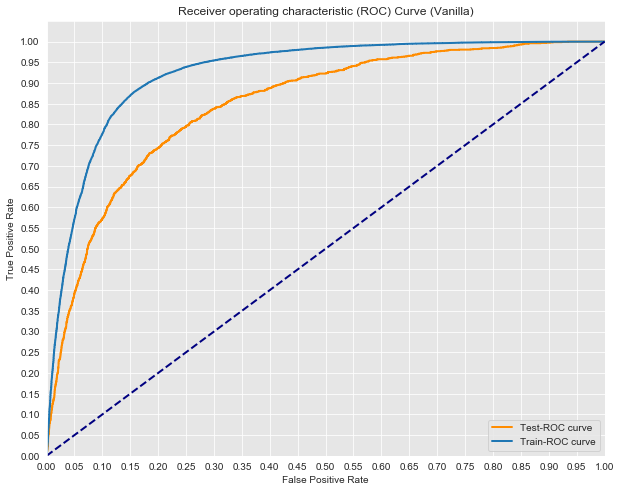

In [36]:

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('Test-AUC: {}'.format(auc(fpr, tpr)))
print('Train-AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test-ROC curve')
plt.plot(train_fpr, train_tpr,
         lw=lw, label='Train-ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (Vanilla)')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Use Gridsearch to tune the regularization hyperparameter
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid)
log_reg_search.fit(X_resamp, y_resamp)
log_reg_search.best_params_

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.01}

In [38]:
tuned_logreg = LogisticRegression(C=0.01, fit_intercept=True, solver='liblinear')
tuned_logreg.fit(X_resamp, y_resamp)

tune_y_score = tuned_logreg.decision_function(X_test)
tune_y_pred = tuned_logreg.predict(X_test)

tune_fpr, tune_tpr, tune_thresholds = roc_curve(y_test, tune_y_score)

cnf_matrix = confusion_matrix(y_test, y_pred)

tune_y_train_score = tuned_logreg.decision_function(X_resamp)
tune_train_fpr, tune_train_tpr, tune_train_thresholds = roc_curve(y_resamp, tune_y_train_score)

Test-AUC: 0.845504563967164
Train-AUC: 0.9261225654556146


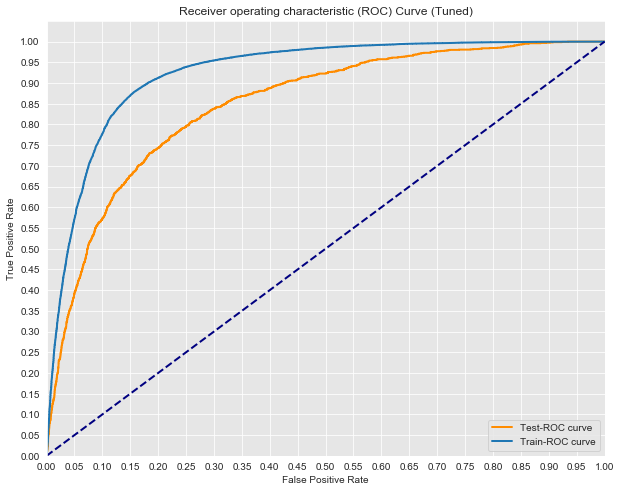

In [39]:

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('Test-AUC: {}'.format(auc(tune_fpr, tune_tpr)))
print('Train-AUC: {}'.format(auc(tune_train_fpr, tune_train_tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test-ROC curve')
plt.plot(train_fpr, train_tpr,
         lw=lw, label='Train-ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (Tuned)')
plt.legend(loc='lower right')
plt.show()

In [40]:
y_test.value_counts()

0    12009
1     1555
Name: Target, dtype: int64

[[10107  1902]
 [  486  1069]]


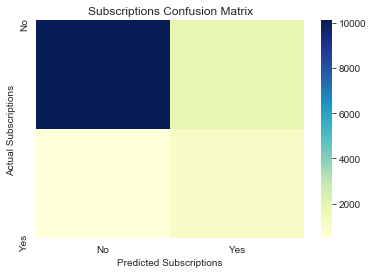

In [41]:
labels = ['No', 'Yes']

sns.heatmap(cnf_matrix, cmap='YlGnBu', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Subscriptions Confusion Matrix')
plt.ylabel('Actual Subscriptions')
plt.xlabel('Predicted Subscriptions')
print(cnf_matrix)

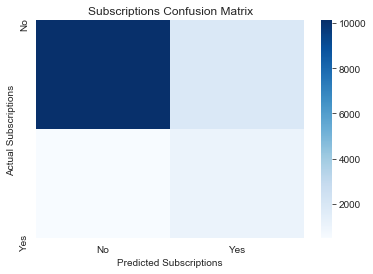

[[10116  1893]
 [  495  1060]]


In [42]:
# confusion matrix for model with tuned C
labels = ['No', 'Yes']
tune_cnf_matrix = confusion_matrix(y_test, tune_y_pred)
sns.heatmap(tune_cnf_matrix, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Subscriptions Confusion Matrix')
plt.ylabel('Actual Subscriptions')
plt.xlabel('Predicted Subscriptions')



plt.show()
print(tune_cnf_matrix)

# Logistic Regression Results:
> The tuned model had more False Negatives than the model that wasn't tuned.  480 customers that did subscribe for a term deposit were predicted to be non-subscribers.  Ideally, this number would get closer to zero so that the model doesn't miss any subscribers.

# Ensemble Methods

> Look at Decision Tree Classifier and RandomForest

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt_clf.fit(X_resamp, y_resamp)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
dt_pred = dt_clf.predict(X_test)
dt_conf = confusion_matrix(y_test, dt_pred)
print(dt_conf)
print(accuracy_score(y_test, dt_pred))

[[9592 2417]
 [ 330 1225]]
0.7974786198761428


[[9592 2417]
 [ 330 1225]]


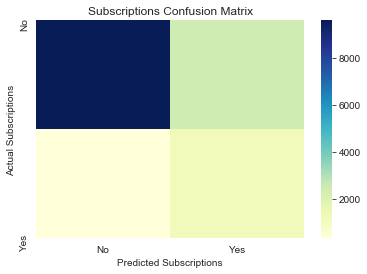

In [46]:
labels = ['No', 'Yes']

sns.heatmap(dt_conf, cmap='YlGnBu', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Subscriptions Confusion Matrix')
plt.ylabel('Actual Subscriptions')
plt.xlabel('Predicted Subscriptions')
print(dt_conf)

In [47]:
print(dt_clf.score(X_resamp, y_resamp))
print(dt_clf.score(X_test, y_test))

0.8535270304159353
0.7974786198761428


In [48]:
feat_imp = pd.DataFrame(dt_clf.feature_importances_, columns=['Importance'], index=X.columns)
feat_imp

,Importance
age,0.000000
balance,0.000300
day,0.000000
duration,0.536494
campaign,0.018232
pdays,0.007548
previous,0.000000
job,0.012602
marital,0.000000
education,0.000000


Text(0, 0.5, 'Features')

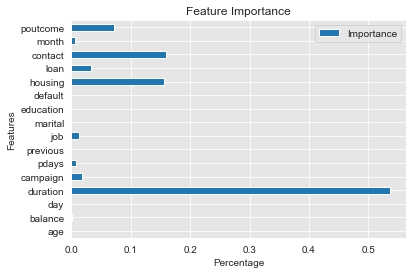

In [49]:
feat_imp.plot.barh()
plt.title("Feature Importance")
plt.xlabel('Percentage')
plt.ylabel('Features')

In [50]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_resamp, y_resamp)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
forest_pred = forest.predict(X_test)

In [52]:
forest.score(X_resamp, y_resamp)

0.868734998029592

In [53]:
forest.score(X_test, y_test)

0.8243143615452669

In [54]:
forest_cnf_matrix = confusion_matrix(y_test, forest_pred)
forest_cnf_matrix

array([[10018,  1991],
       [  392,  1163]])

Text(0, 0.5, 'Features')

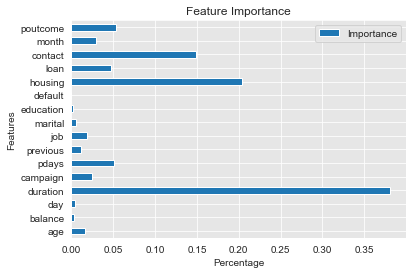

In [55]:
forest_feat_imp = pd.DataFrame(forest.feature_importances_, columns=['Importance'], index=X.columns)

forest_feat_imp.plot.barh()
plt.title("Feature Importance")
plt.xlabel('Percentage')
plt.ylabel('Features')

In [56]:
forest_feat_imp

,Importance
age,0.016736
balance,0.002905
day,0.004129
duration,0.380924
campaign,0.024952
pdays,0.050513
previous,0.011732
job,0.018677
marital,0.005172
education,0.001421


# Ensemble Methods Results:
> The Decision Tree Classifier yielded better results with respect to the False Negatives in the confusion matrix.  With parameter tuning, that number could go down even more.  Both classifiers scored similarily and generalized similarily.

> The feature importance showed that the duration was the most relevant feature from both classifiers.  The exploration into duration earlier showed that subscribers had the duration of their last call run from about 250 seconds and greater.

> Another important feature was housing.  There are more subscribers that don't have housing loans than those with housing loans.

> Lastly, the phone contact preference showed relevance to the target as well.  Comparing this to the results from the subscribers showed that cellular phones were the preferred option.

# Conclusion:

> Classifying term deposit subscribers displayed how effective different classifying methods can be.  Out of all the classifiers used, Decision Tree had the fewest False Negatives.  This is crucial since we want to minimize the amount of actual subscribers the model misses.  

> It is recommended that clients be contacted via cellular phones, instead of landline telephones.  4,369 subscribers were contacted via cellphone versus 360 subscribers on landline.

> Subscribers without housing loans were present more than subscribers with housing loans.  The ratio was less than 2:1 so it is recommended to consider clients with or witout housing loans.

> It is also recommended to pitch the client longer than about 5 minutes.  Subscribers were on the phone for about 5 minutes or more before subscribing.